In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

C:\Users\wsh10\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(1, 784)


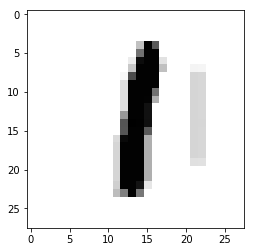

In [2]:
sample_image = mnist.train.next_batch(1)[0]
print(sample_image.shape)

sample_image = sample_image.reshape([28, 28])
plt.imshow(sample_image, cmap = 'Greys')

In [2]:
total_epoch = 100
batch_size = 100
learning_rate = 0.0002

# 신경망 레이어 구성 옵션
n_hidden = 256
n_input = 28 * 28
n_noise = 128  # 생성기의 입력값으로 사용할 노이즈의 크기

In [3]:
X = tf.placeholder(tf.float32, [None, n_input])
Z = tf.placeholder(tf.float32, [None, n_noise])

In [4]:
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

In [5]:
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))

In [6]:
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1]))

In [7]:
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2)
    return output

In [8]:
def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2)
    return output

In [9]:
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))

In [10]:
G = generator(Z)
D_gene = discriminator(G)
D_real = discriminator(X)

In [11]:
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))
loss_G = tf.reduce_mean(tf.log(D_gene))

D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D, var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G, var_list=G_var_list)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Z: noise})


    print('Epoch:', '%04d' % epoch,'D loss: {:.4}'.format(loss_val_D),'G loss: {:.4}'.format(loss_val_G))

    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})
        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i], (28, 28)))

        plt.savefig('C:\\image\\test\\{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        plt.close(fig)

Epoch: 0000 D loss: -0.5076 G loss: -2.063
Epoch: 0001 D loss: -0.3537 G loss: -2.484
Epoch: 0002 D loss: -0.1224 G loss: -3.22
Epoch: 0003 D loss: -0.4972 G loss: -1.673
Epoch: 0004 D loss: -0.6647 G loss: -1.478
Epoch: 0005 D loss: -0.3287 G loss: -2.107
Epoch: 0006 D loss: -0.2757 G loss: -2.357
Epoch: 0007 D loss: -0.2777 G loss: -2.401
Epoch: 0008 D loss: -0.3871 G loss: -2.443
Epoch: 0009 D loss: -0.5407 G loss: -2.028
Epoch: 0010 D loss: -0.3328 G loss: -2.243
Epoch: 0011 D loss: -0.3645 G loss: -2.208
Epoch: 0012 D loss: -0.4361 G loss: -2.01
Epoch: 0013 D loss: -0.2922 G loss: -2.633
Epoch: 0014 D loss: -0.4605 G loss: -2.249
Epoch: 0015 D loss: -0.5031 G loss: -1.974
Epoch: 0016 D loss: -0.457 G loss: -2.08
Epoch: 0017 D loss: -0.4484 G loss: -2.09
Epoch: 0018 D loss: -0.3683 G loss: -2.334
Epoch: 0019 D loss: -0.5894 G loss: -2.22
Epoch: 0020 D loss: -0.4846 G loss: -2.105
Epoch: 0021 D loss: -0.5588 G loss: -2.316
Epoch: 0022 D loss: -0.471 G loss: -2.495
Epoch: 0023 D loss